In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [175]:
dfx=pd.read_csv('./Training_Data/Linear_X_Train.csv')
dfy=pd.read_csv('./Training_Data/Linear_Y_Train.csv')
x=dfx.values
y=dfy.values
print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


In [176]:
x=x.reshape((-1,))
print(x)
y=y.reshape((-1,))
print(y)

[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]
[-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


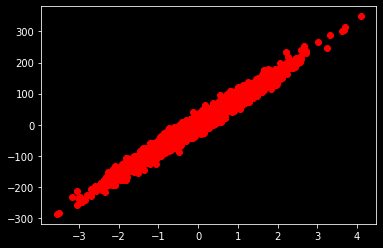

In [177]:
plt.scatter(x,y,color='r')
X=(x-x.mean())/x.std()
Y=y


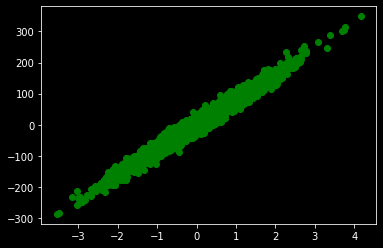

In [178]:
plt.scatter(X,Y,color='g')

In [179]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    err=0
    for i in range(X.shape[0]):
        err+=(hypothesis(X[i],theta)-Y[i])**2
    return err

def gradient(X,Y,theta):
    grad=np.zeros(2)
    for i in range(X.shape[0]):
        hyp=hypothesis(X[i],theta)
        grad[0]+=hyp-Y[i]
        grad[1]+=(hyp-Y[i])*X[i]
    return grad

def gradient_decent(X,Y,learning_rate=0.0001):
    theta=[-300,100]
    err_list=[]
    theta_list=[]
    for i in range(500):
        theta[0]-=gradient(X,Y,theta)[0]*learning_rate
        theta[1]-=gradient(X,Y,theta)[1]*learning_rate
        err=error(X,Y,theta)
        theta_list.append(theta)
        err_list.append(err)
    return theta,err_list,theta_list



[0.6838689680155884, 79.90573694249979]


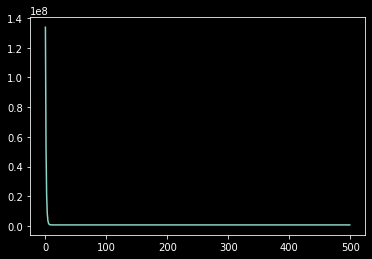

In [180]:

X_=pd.read_csv('./Testing_Data/Linear_X_Test.csv')
X_=X_.values.reshape((-1,))

theta_result,err_list,theta_list=gradient_decent(X,Y)
plt.plot(err_list)
print(theta_result)

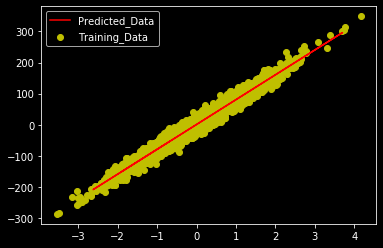

In [181]:
plt.scatter(X,Y,color='y',label='Training_Data')
plt.plot(X_,hypothesis(X_,theta_result),color='r',label='Predicted_Data')
plt.legend()
plt.show()